Epoch 1/5
313/313 [==============================] - 72s 225ms/step - loss: 0.4343 - accuracy: 0.7922 - val_loss: 0.3341 - val_accuracy: 0.8600
Epoch 2/5
313/313 [==============================] - 75s 240ms/step - loss: 0.2475 - accuracy: 0.9039 - val_loss: 0.3306 - val_accuracy: 0.8672
Epoch 3/5
313/313 [==============================] - 75s 239ms/step - loss: 0.1878 - accuracy: 0.9304 - val_loss: 0.3810 - val_accuracy: 0.8366
Epoch 4/5
313/313 [==============================] - 77s 247ms/step - loss: 0.1373 - accuracy: 0.9509 - val_loss: 0.4052 - val_accuracy: 0.8406
Epoch 5/5
313/313 [==============================] - 81s 259ms/step - loss: 0.1022 - accuracy: 0.9638 - val_loss: 0.4349 - val_accuracy: 0.8428
Epoch 1/5
313/313 [==============================] - 54s 168ms/step - loss: 0.4774 - accuracy: 0.7648 - val_loss: 0.3618 - val_accuracy: 0.8482
Epoch 2/5
313/313 [==============================] - 55s 177ms/step - loss: 0.2735 - accuracy: 0.8903 - val_loss: 0.3395 - val_accuracy:

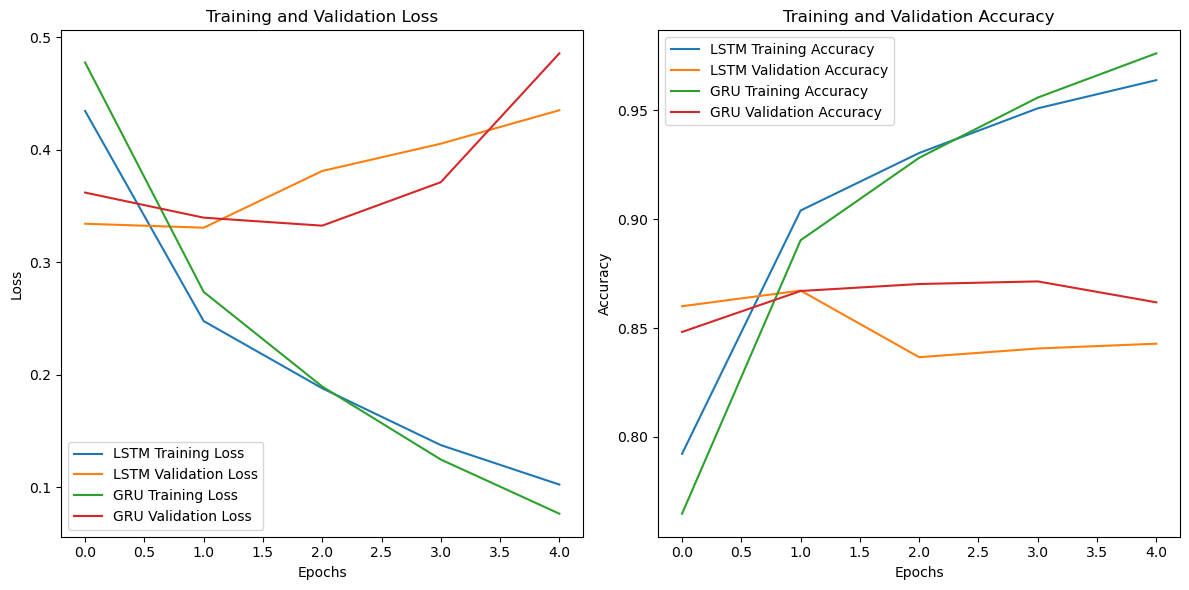

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense

num_words = 10000
max_length = 200
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

# LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=num_words, output_dim=128, input_length=max_length))
lstm_model.add(LSTM(128))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#GRU model
gru_model = Sequential()
gru_model.add(Embedding(input_dim=num_words, output_dim=128, input_length=max_length))
gru_model.add(GRU(128))
gru_model.add(Dense(1, activation='sigmoid'))

gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_history = lstm_model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=64)
gru_history = gru_model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=64)

lstm_loss, lstm_acc = lstm_model.evaluate(X_test, y_test)
gru_loss, gru_acc = gru_model.evaluate(X_test, y_test)

print(f"LSTM Model Accuracy: {round(lstm_acc * 100, 2)}%\nGRU Model Accuracy: {round(gru_acc * 100, 2)}%")

# Plotting training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(gru_history.history['loss'], label='GRU Training Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(gru_history.history['accuracy'], label='GRU Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.tight_layout()
plt.show()